In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.holtwinters import ExponentialSmoothing
data=pd.read_excel('nba_player_data.xlsx')

In [2]:
df=data.copy()

In [3]:
print('first 5 rows of table')
df.head()

first 5 rows of table


year       season_type  PLAYER_ID  RANK             PLAYER     TEAM_ID  \
0  2014-15  Regular%20Season     201935     1       James Harden  1610612745   
1  2014-15  Regular%20Season     201939     2      Stephen Curry  1610612744   
2  2014-15  Regular%20Season     201566     3  Russell Westbrook  1610612760   
3  2014-15  Regular%20Season       2544     4       LeBron James  1610612739   
4  2014-15  Regular%20Season     203081     5     Damian Lillard  1610612757   

  TEAM  GP   MIN  FGM  ...  REB  AST  STL  BLK  TOV   PF   PTS   EFF  AST_TOV  \
0  HOU  81  2981  647  ...  459  565  154   60  321  208  2217  2202     1.76   
1  GSW  80  2613  653  ...  341  619  163   16  249  158  1900  2073     2.49   
2  OKC  67  2302  627  ...  488  574  140   14  293  184  1886  1857     1.96   
3  CLE  69  2493  624  ...  416  511  109   49  272  135  1743  1748     1.88   
4  POR  82  2925  590  ...  378  507   97   21  222  164  1720  1677     2.28   

   STL_TOV  
0     0.48  
1     0.66  
2     0.48  
3     0.40  
4     0.44  

[5 rows x 30 columns]

In [4]:
total_obs=df.shape[0]
print('a) total no of obs is:', total_obs)
total_col=df.shape[1]
print('a) total no of columns is:', total_col)
miss_val=df.isnull().sum()
print('b) missing values are:')
print(miss_val)

a) total no of obs is: 7473
a) total no of columns is: 30
b) missing values are:
year           0
season_type    0
PLAYER_ID      0
RANK           0
PLAYER         0
TEAM_ID        0
TEAM           0
GP             0
MIN            0
FGM            0
FGA            0
FG_PCT         0
FG3M           0
FG3A           0
FG3_PCT        0
FTM            0
FTA            0
FT_PCT         0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
EFF            0
AST_TOV        0
STL_TOV        0
dtype: int64


In [5]:
df['year']=df['year'].str[:4].astype(int)
no_team=df['TEAM'].unique()
print('teams in NBA:', no_team)
df['season_type'].replace('Regular%20Season','rs_20', inplace=True)

teams in NBA: ['HOU' 'GSW' 'OKC' 'CLE' 'POR' 'NOP' 'LAC' 'DAL' 'UTA' 'CHI' 'SAC' 'ORL'
 'MEM' 'MIN' 'WAS' 'PHX' 'MIA' 'TOR' 'BKN' 'ATL' 'DEN' 'DET' 'BOS' 'CHA'
 'SAS' 'MIL' 'NYK' 'PHI' 'IND' 'LAL']


C:\Users\anupa\AppData\Local\Temp\ipykernel_2016\3723536046.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['season_type'].replace('Regular%20Season','rs_20', inplace=True)


In [6]:
 reqd_cols=['MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS' ]
data_permin=df.groupby(['PLAYER','PLAYER_ID','year'])[reqd_cols].sum()
data_permin
for c in data_permin.columns[4:]:
    data_permin[c]=data_permin[c]/data_permin['MIN']
        
data_permin['FG%']=data_permin['FGM']/data_permin['FGA']
data_permin['3PT%']=data_permin['FG3M']/data_permin['FG3A']
data_permin['FT%']=data_permin['FTM']/data_permin['FTA']
data_permin['FG3A%']=data_permin['FG3A']/data_permin['FGA']
data_permin['PTS/FGA%']=data_permin['PTS']/data_permin['FGA']
data_permin['FG3M/FGM%']=data_permin['FG3M']/data_permin['FGM']
data_permin['FTA/FGA%']=data_permin['FTA']/data_permin['FGA']
data_permin['TRU%']=data_permin['PTS']/(data_permin['FGA']+0.475*data_permin['FTA'])
data_permin['AST_TOV%']=data_permin['AST']/data_permin['TOV']
above_50=data_permin[data_permin['MIN']>=50]
print('correlation of attributes')
fig=px.imshow(data_permin.corr())
fig.show()

correlation of attributes


In [7]:
reqd_cols=['MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS' ]
dt=df.groupby('year')[reqd_cols].sum().reset_index()
dt['POSS']=dt['FGA']-dt['OREB']+dt['TOV']+0.44*dt['FTA']
dt1=dt[list(dt.columns[:2])+['POSS']+list(dt.columns[2:-1])]
dt1['FG%']=dt1['FGM']/dt1['FGA']
dt1['3PT%']=dt1['FG3M']/dt1['FG3A']
dt1['FT%']=dt1['FTM']/dt1['FTA']
dt1['FG3A%']=dt1['FG3A']/dt1['FGA']
dt1['PTS/FGA%']=dt1['PTS']/dt1['FGA']
dt1['FG3M/FGM%']=dt1['FG3M']/dt1['FGM']
dt1['FTA/FGA%']=dt1['FTA']/dt1['FGA']
dt1['TRU%']=dt1['PTS']/(dt1['FGA']+0.475*dt1['FTA'])
dt1['AST_TOV%']=dt1['AST']/dt1['TOV']
dt1

C:\Users\anupa\AppData\Local\Temp\ipykernel_2016\1591785671.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\anupa\AppData\Local\Temp\ipykernel_2016\1591785671.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\anupa\AppData\Local\Temp\ipykernel_2016\1591785671.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

year     MIN       POSS     FGM     FGA   FG3M   FG3A    FTM    FTA   OREB  \
0  2014  634546  253004.12   98251  219265  20724  59276  45098  60248  28566   
1  2015  636391  258064.80  100351  222344  22524  63673  46516  61520  27426   
2  2016  632482  258443.80  102147  223333  25408  71018  46806  60620  26470   
3  2017  633425  260904.52  103729  225523  27530  76245  43721  57008  25397   
4  2018  634231  268739.84  107374  233717  29817  84143  46671  60811  27128   
5  2019  552262  234384.64   92997  202223  28032  78279  40949  52906  22802   
6  2020  562518  235759.48   95849  205754  29549  80653  39624  50917  22918   
7  2021  635572  264004.96  106569  231293  32733  92552  44740  57709  27052   
8  2022  635386  266600.04  110010  231870  32382  89926  48136  61516  27403   
9  2023  633272  263500.48  110138  232542  33501  91831  44504  56767  27618   

   ...     PTS       FG%      3PT%       FT%     FG3A%  PTS/FGA%  FG3M/FGM%  \
0  ...  262324  0.448092  0.349619  0.748539  0.270340  1.196379   0.210929   
1  ...  269742  0.451332  0.353745  0.756112  0.286372  1.213174   0.224452   
2  ...  276508  0.457375  0.357768  0.772121  0.317992  1.238097   0.248740   
3  ...  278709  0.459949  0.361073  0.766927  0.338081  1.235834   0.265403   
4  ...  291236  0.459419  0.354361  0.767476  0.360021  1.246105   0.277693   
5  ...  254975  0.459874  0.358104  0.773995  0.387092  1.260861   0.301429   
6  ...  260871  0.465843  0.366372  0.778208  0.391988  1.267878   0.308287   
7  ...  290611  0.460753  0.353671  0.775269  0.400150  1.256463   0.307153   
8  ...  300538  0.474447  0.360096  0.782496  0.387829  1.296149   0.294355   
9  ...  298281  0.473626  0.364811  0.783977  0.394901  1.282697   0.304173   

   FTA/FGA%      TRU%  AST_TOV%  
0  0.274773  1.058258  1.612666  
1  0.276688  1.072251  1.614585  
2  0.271433  1.096699  1.694798  
3  0.252781  1.103353  1.701611  
4  0.260191  1.109039  1.815477  
5  0.261622  1.121492  1.749882  
6  0.247465  1.134520  1.877818  
7  0.249506  1.123331  1.879960  
8  0.265304  1.151089  1.889722  
9  0.244115  1.149417  2.065776  

[10 rows x 27 columns]

In [8]:
dt1_copy=dt1.copy()
for c in dt1_copy.columns[2:18]:
    dt1_copy[c]=(dt1_copy[c]/dt1_copy['MIN'])*48*5
dt1_copy.drop(columns='MIN',inplace=True)
fig=go.Figure()
for c in dt1_copy.columns[1:]:
    fig.add_trace(go.Scatter(x=dt1_copy['year'],y=dt1_copy[c],name=f'{c}'))
print('Time series analysis of all teams by attributes')
fig.show()

Time series analysis of all teams by attributes


In [9]:
season_copy=df[df['season_type']=='rs_20']
fgm1=season_copy[['year','TEAM','FGM']]
dg=fgm1[fgm1['TEAM']=='CLE']
dg.head()
lg=dg.groupby('year')['FGM'].sum().reset_index()
lg.rename(columns={'FGM':'CLE'},inplace=True)
teams=['OKC','MIA', 'HOU', 'NYK', 'GSW', 'MIL', 'POR', 'TOR',
       'BKN', 'CHA', 'LAC', 'BOS', 'UTA', 'PHI', 'IND', 'SAS', 'ATL',
       'LAL', 'NOP', 'DET', 'CHI', 'SAC', 'DAL', 'DEN', 'MEM', 'PHX',
       'ORL', 'MIN', 'WAS']
for t in teams:
    g=fgm1[fgm1['TEAM']==t]
    g1=g.groupby('year')['FGM'].sum().reset_index()
    g1.rename(columns={'FGM':t},inplace=True)
    lg=pd.merge(lg,g1,how='left',on='year')
print('the time series data of teams for seasons')
lg

the time series data of teams for seasons


year   CLE   OKC   MIA   HOU   NYK   GSW   MIL   POR   TOR  ...   DET  \
0  2014  3372  3559  2915  3412  2565  3410  3110  3450  3113  ...  2952   
1  2015  3235  3437  3509  2877  3043  3501  3147  3228  3026  ...  3091   
2  2016  3583  3439  3148  3532  3093  3674  3487  3159  3490  ...  3269   
3  2017  3567  3349  3457  3311  3248  3509  3342  3192  3410  ...  3161   
4  2018  2957  3630  2848  3312  2795  3612  3869  3818  3525  ...  3038   
5  2019  2784  2875  3024  3034  2515  1794  3244  2957  2897  ...  2228   
6  2020  2606  2616  2905  2615  2861  2919  3334  2965  2845  ...  2660   
7  2021  3419  3146  3274  3242  3211  3320  3505  3045  3475  ...  2985   
8  2022  3300  3405  3251  3036  3720  3503  3477  3291  3761  ...  3056   
9  2023  3515  3836  3482  3425  3608  3582  3623  3182  3302  ...  3331   

    CHI   SAC   DAL   DEN   MEM   PHX   ORL   MIN   WAS  
0  3001  3020  3317  2783  3189  3128  3076  2674  3123  
1  3148  3283  3122  3050  2629  2952  3179  2933  3570  
2  2967  2841  2785  3532  2938  3123  3021  3283  3806  
3  3124  3005  3158  3327  2864  3155  2965  3376  3292  
4  2984  3785  2909  3439  2956  3421  3302  3422  3375  
5  2573  3252  3323  3110  3051  2942  2994  2129  3008  
6  3446  3120  2976  3283  3029  3128  2235  2932  3076  
7  3503  3518  3191  3592  3571  3746  3124  3430  3095  
8  3488  3579  3318  3787  3680  3562  3065  3427  3294  
9  3448  3553  3748  3610  2867  3602  3318  3279  3309  

[10 rows x 31 columns]

In [10]:
print('time series visualisation for teams in season')
fig1=go.Figure()
for col in lg.columns[1:]:
    fig1.add_trace(go.Scatter(x=lg['year'],y=lg[col],name=f'{col}'))
        
fig1.show()

time series visualisation for teams in season


In [11]:
Playoff_data=df[df['season_type']=='Playoffs']
fgm2=Playoff_data[['year','TEAM','FGM']]
dg1=fgm2[fgm2['TEAM']=='CLE']
lg1=dg1.groupby('year')['FGM'].sum().reset_index()
lg1.rename(columns={'FGM':'CLE'},inplace=True)
teams=['OKC','MIA', 'HOU', 'NYK', 'GSW', 'MIL', 'POR', 'TOR',
       'BKN', 'CHA', 'LAC', 'BOS', 'UTA', 'PHI', 'IND', 'SAS', 'ATL',
       'LAL', 'NOP', 'DET', 'CHI', 'SAC', 'DAL', 'DEN', 'MEM', 'PHX',
       'ORL', 'MIN', 'WAS']
for t in teams:
    d=fgm2[fgm2['TEAM']==t]
    d1=d.groupby('year')['FGM'].sum().reset_index()
    d1.rename(columns={'FGM':t},inplace=True)
    lg1=pd.merge(lg1,d1,how='left',on='year')
print('the time series data of teams for the playoff')
lg1

the time series data of teams for the playoff


year  CLE    OKC    MIA    HOU    NYK    GSW    MIL    POR    TOR  ...  \
0  2014  694    NaN    NaN  635.0    NaN  802.0  205.0  167.0  147.0  ...   
1  2015  805  688.0  516.0  165.0    NaN  934.0    NaN  408.0  685.0  ...   
2  2016  737  193.0    NaN  410.0    NaN  730.0  209.0  142.0  353.0  ...   
3  2017  811  223.0  183.0  632.0    NaN  866.0  274.0  165.0  389.0  ...   
4  2022  176    NaN  914.0    NaN  388.0  545.0  220.0    NaN    NaN  ...   
5  2023  449  394.0  178.0    NaN  517.0    NaN  245.0    NaN    NaN  ...   

     DET    CHI    SAC    DAL    DEN    MEM    PHX    ORL    MIN    WAS  
0    NaN  421.0    NaN  208.0    NaN  393.0    NaN    NaN    NaN  373.0  
1  143.0    1.0    NaN  177.0    NaN  128.0    NaN    NaN    NaN    NaN  
2    NaN  218.0    NaN    NaN    NaN  208.0    NaN    NaN    NaN  521.0  
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  190.0  238.0  
4    NaN    NaN  287.0    NaN  845.0  230.0  474.0    NaN  189.0    NaN  
5    NaN    NaN    NaN  855.0  467.0    NaN  141.0  247.0  620.0    NaN  

[6 rows x 31 columns]

In [12]:
print('time series visualisation for teams for playoffs')
fig1=go.Figure()
for col in lg1.columns[1:]:
    fig1.add_trace(go.Scatter(x=lg1['year'],y=lg1[col],name=f'{col}'))
        
fig1.show()

time series visualisation for teams for playoffs


Contribution of steals from each team in playoffs


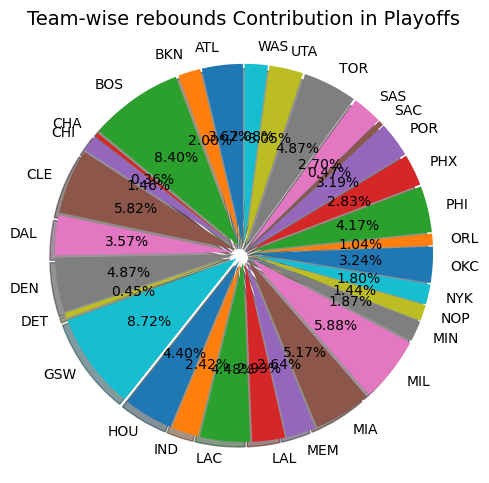

In [44]:
rows = ['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'REB', 'AST', 'STL', 'BLK', 'TOV']
gpd = Playoff_data.groupby('TEAM', as_index=False)[rows].sum()

# Calculating percentages
gpd['FG%'] = gpd['FGM'] / gpd['FGA']
gpd['3PT%'] = gpd['FG3M'] / gpd['FG3A']
gpd['FT%'] = gpd['FTM'] / gpd['FTA']
print('Contribution of steals from each team in playoffs')
labels = gpd['TEAM']
sizes = gpd['REB']
explode = [0.05] * len(labels)  

plt.figure(figsize=(5, 5))
plt.pie(sizes,labels=labels,autopct='%.2f%%',explode=explode,shadow=True,startangle=90)
plt.title('Team-wise rebounds Contribution in Playoffs', fontsize=14)
plt.axis('equal')  # keeps the pie chart as a circle
plt.tight_layout()
plt.show()

Comparision of teams based on three atttributes


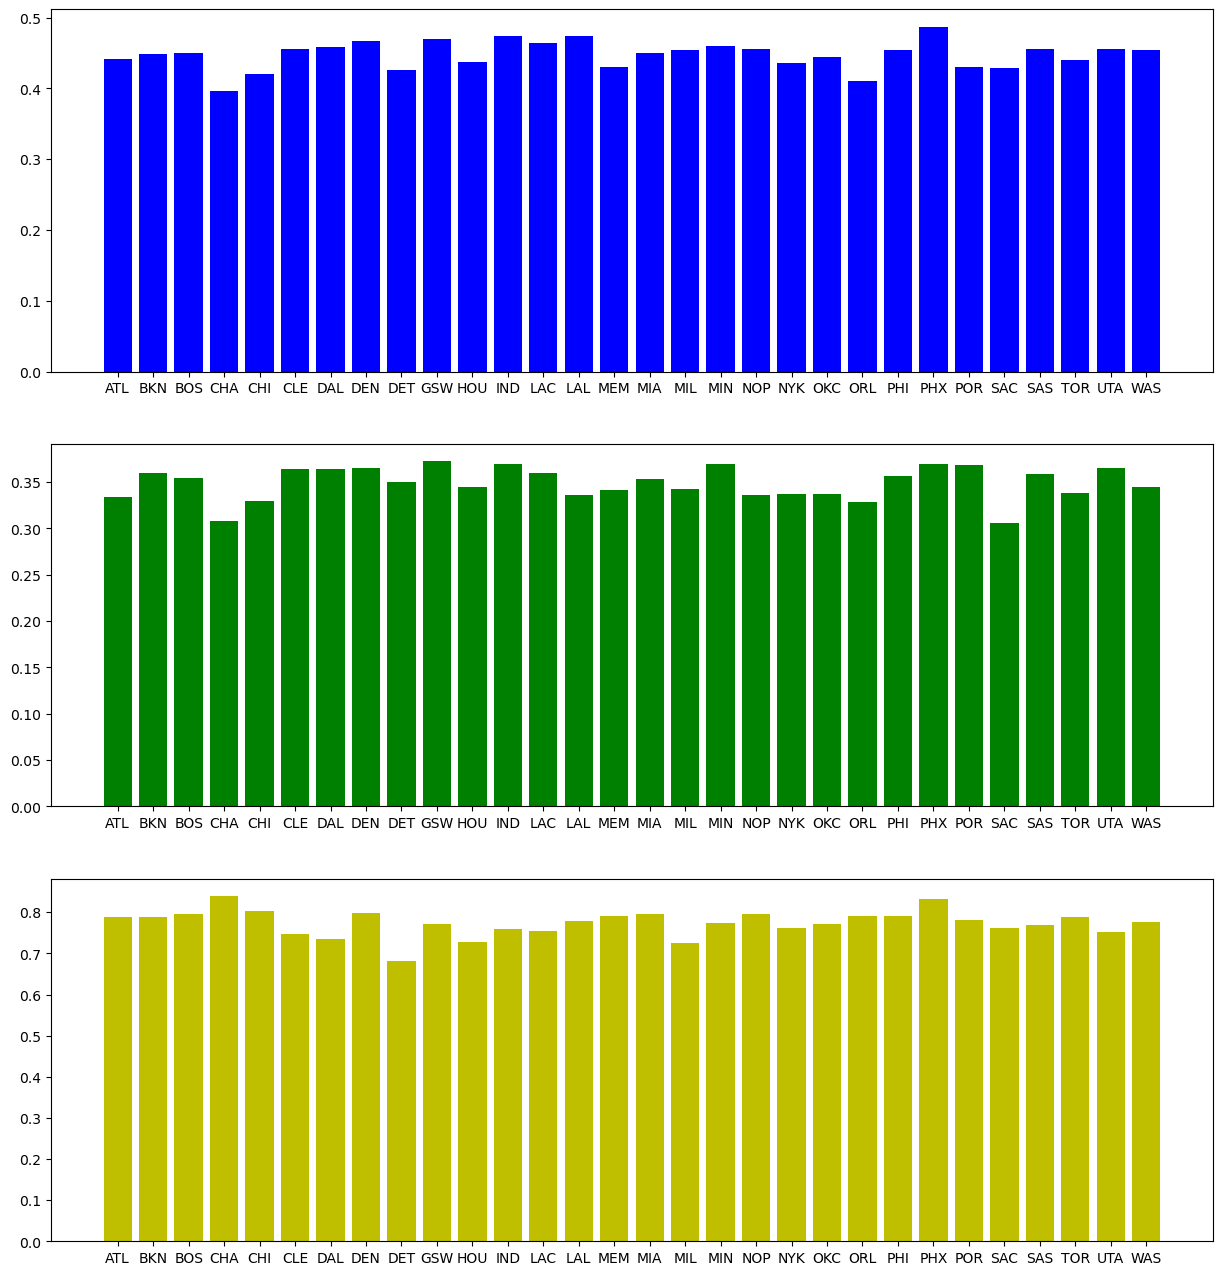

In [14]:
print('Comparision of teams based on three atttributes')
fig,axes=plt.subplots(3,1,figsize=(15,16))
axes[0].bar(gpd['TEAM'],gpd['FG%'],color='b')
axes[1].bar(gpd['TEAM'],gpd['3PT%'],color='g')
axes[2].bar(gpd['TEAM'],gpd['FT%'],color='y')
plt.show()

In [15]:
req_col1=['FGM','FGA', 'FG3M', 'FG3A', 'FTM', 'FTA',
                'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
p=df.groupby(['year','TEAM'])[req_col1].sum().reset_index()
p1=p[p['TEAM']=='GSW']
dg_y=p1[p1['year']==2014]
lis=["CLE", "GSW", "GSW", "TOR", "LAL", "MIL", "GSW", "DEN", "BOS"]
year=2014
for i in lis:
    dat=p[p['TEAM']==i]
    data_year=dat[dat['year']==year+1]
    dg_y=pd.concat([dg_y,data_year],axis=0)
    year+=1
dg_y

year TEAM   FGM   FGA  FG3M  FG3A   FTM   FTA   REB   AST  STL  BLK  \
9    2014  GSW  4212  8906  1123  2858  1638  2174  4625  2763  930  617   
35   2015  CLE  4040  8755  1191  3201  1686  2263  4626  2343  729  421   
69   2016  GSW  4404  8988  1267  3329  1857  2345  4710  3116  966  675   
99   2017  GSW  4375  8785  1161  3028  1712  2096  4513  2949  821  734   
147  2018  TOR  4429  9498  1340  3694  2007  2471  4737  2880  883  561   
163  2019  LAL  3991  8289  1079  3054  1702  2308  4310  2399  799  590   
196  2020  MIL  4302  8979  1319  3564  1574  2094  4763  2405  811  450   
219  2021  GSW  4230  8976  1484  4051  1613  2100  4689  2814  889  480   
247  2022  DEN  4632  9106  1186  3144  1787  2348  4676  2951  766  463   
272  2023  BOS  4441  9224  1641  4312  1654  2067  4766  2724  732  678   

      TOV    PF    PTS  
9    1453  2099  11185  
35   1322  2125  10957  
69   1494  2089  11932  
99   1488  2021  11623  
147  1461  2254  12205  
163  1408  2026  10763  
196  1311  1760  11497  
219  1476  2195  11557  
247  1382  1977  12237  
272  1154  1699  12177

In [16]:
print('time series analysis of the last 10 years winner based on attributes')
comp=go.Figure()
for i in dg_y.columns[2:]:
    comp.add_trace(go.Scatter(x=dg_y['year'],y=dg_y[i],name=f'{i}'))
comp.show()

time series analysis of the last 10 years winner based on attributes


C:\Users\anupa\AppData\Local\Temp\ipykernel_2016\857304269.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\anupa\AppData\Local\Temp\ipykernel_2016\857304269.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\anupa\AppData\Local\Temp\ipykernel_2016\857304269.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

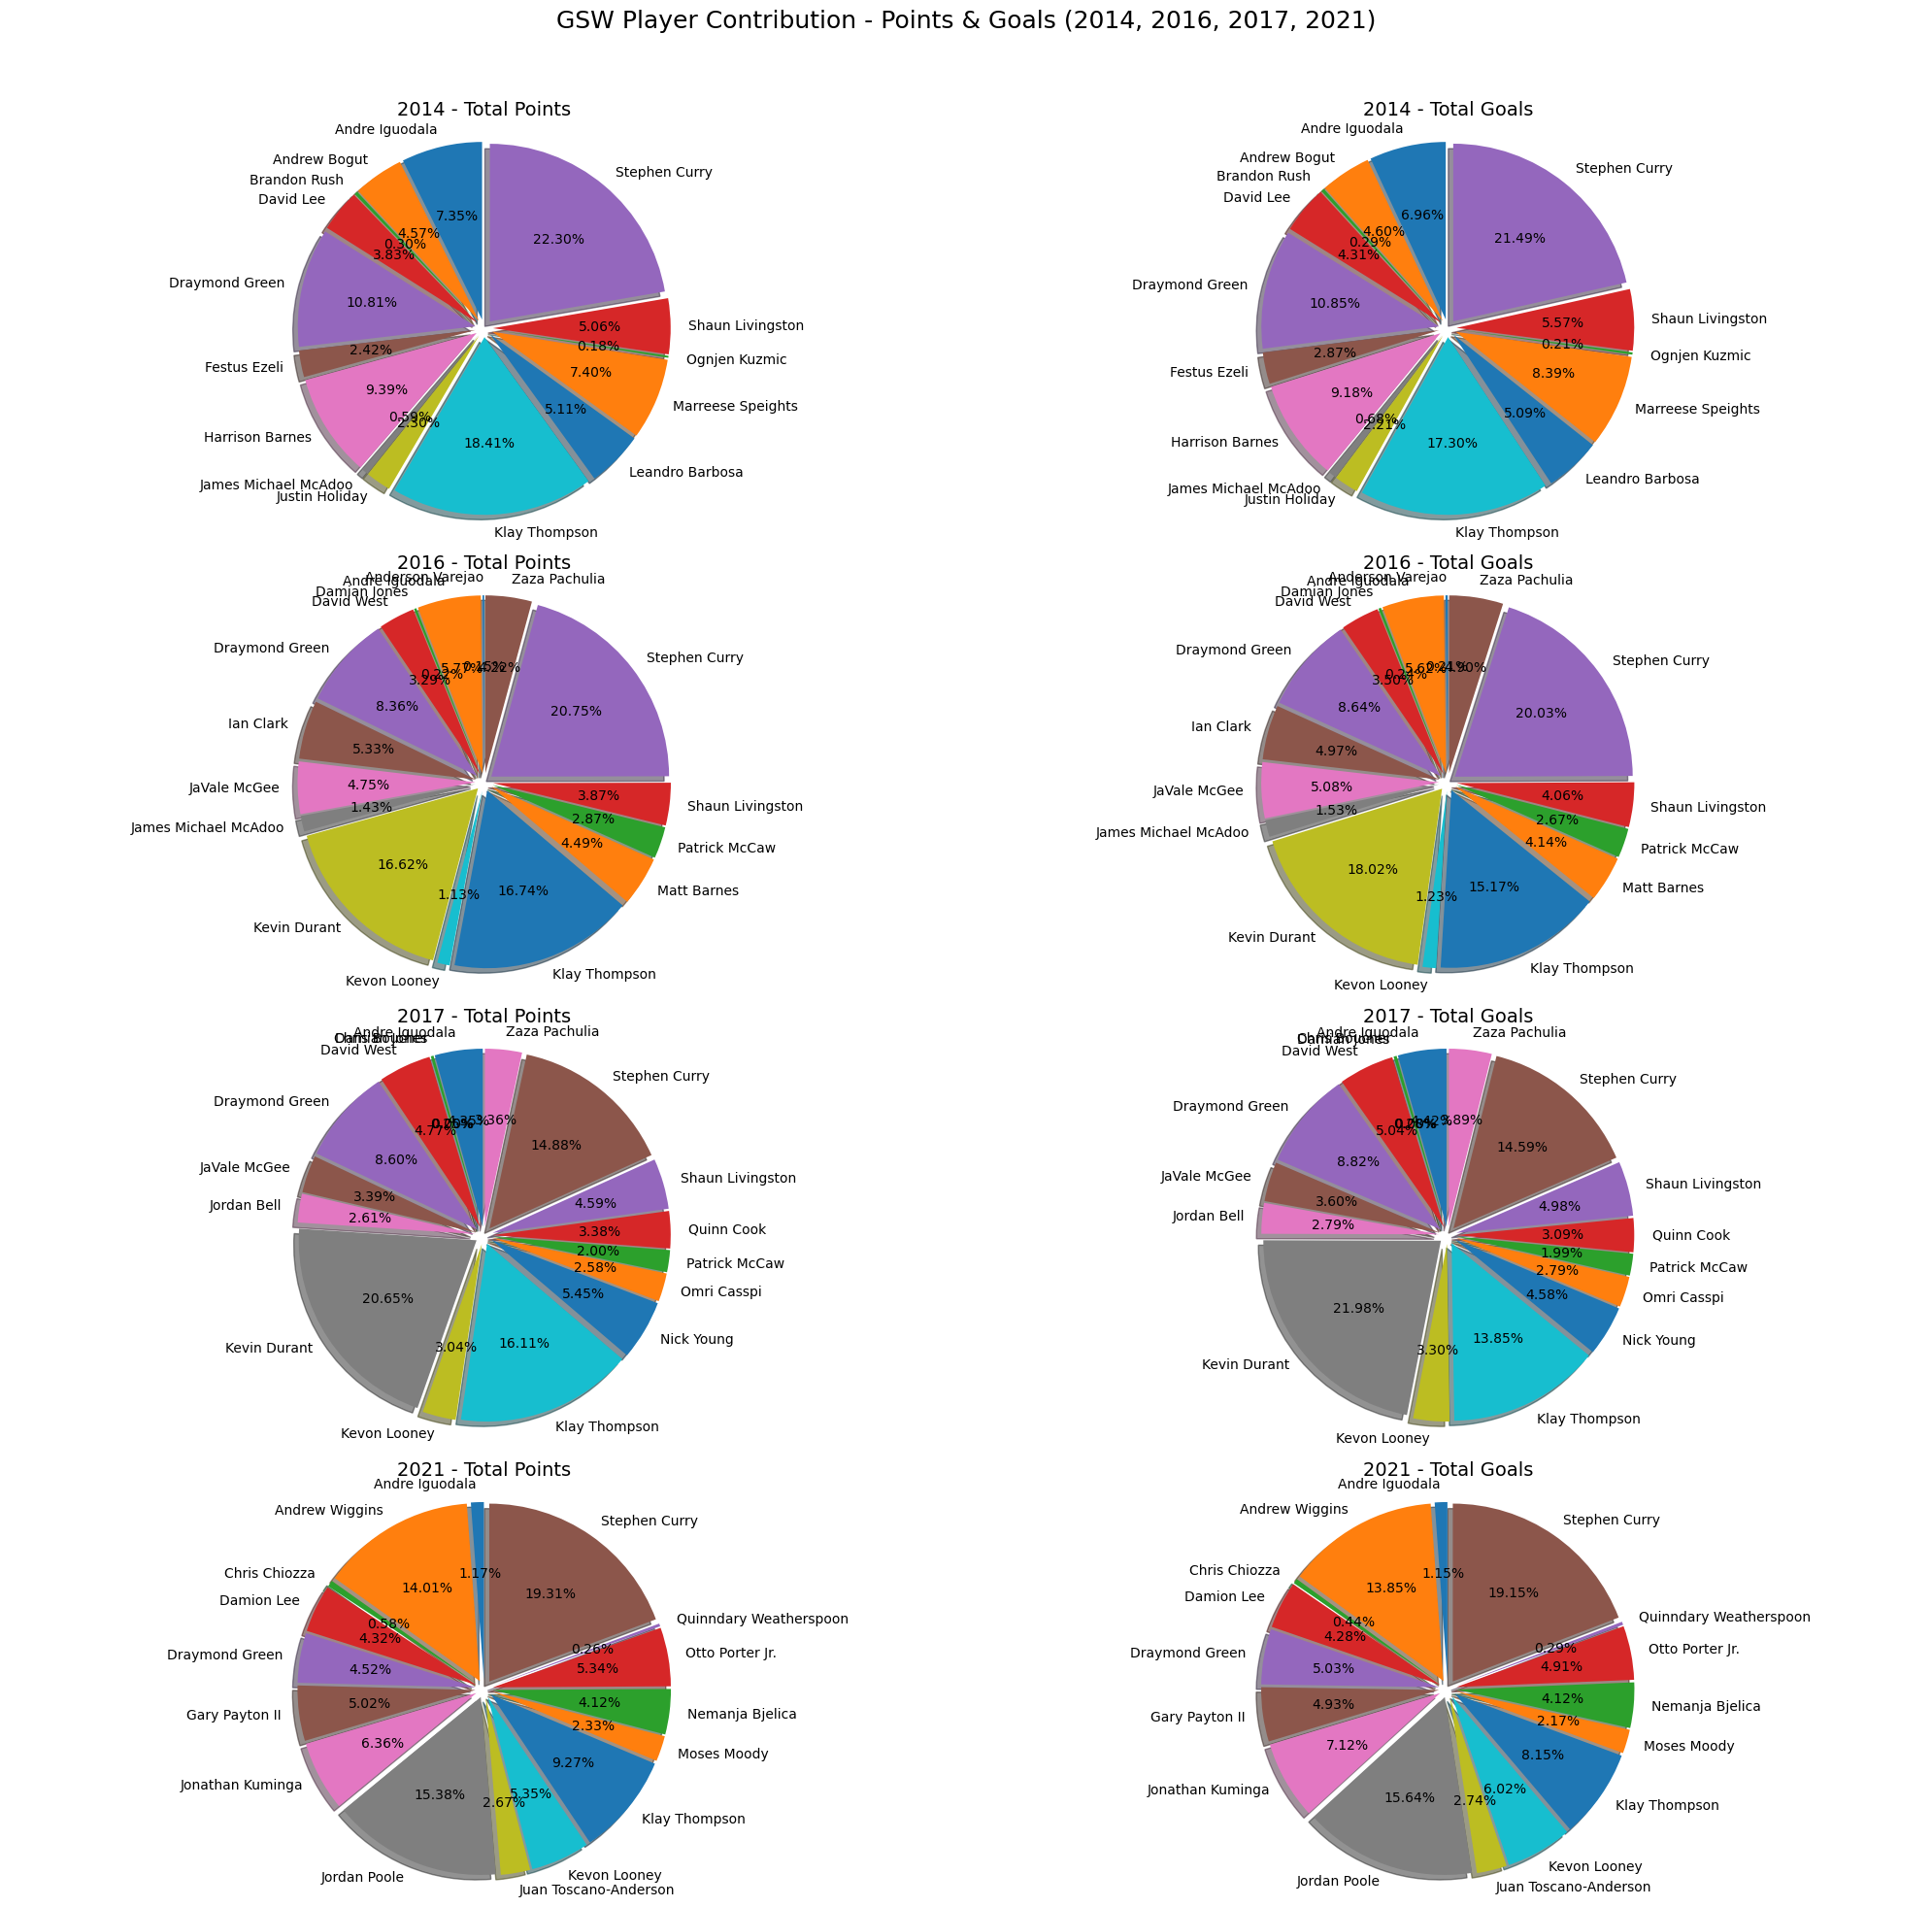

In [17]:
req_col = ['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA',
           'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
z = df.groupby(['year', 'TEAM', 'PLAYER'])[req_col].sum().reset_index()

# Prepare subplot
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
fig.suptitle('GSW Player Contribution - Points & Goals (2014, 2016, 2017, 2021)', fontsize=18)

# --- 2014 ---
z1 = z[z['year'] == 2014]
z2 = z1[z1['TEAM'] == 'GSW']
z2['Total goals_pts'] = 2 * (z2['FGM'] - z2['FG3M']) + 3 * z2['FG3M'] + z2['FTM']
z2['total_goals'] = z2['FGM'] + z2['FTM']
explode1 = [0.05] * len(z2)
axes[0, 0].pie(z2['Total goals_pts'], labels=z2['PLAYER'], autopct='%.2f%%',
               explode=explode1, shadow=True, startangle=90)
axes[0, 0].axis('equal')
axes[0, 0].set_title('2014 - Total Points', fontsize=14)
axes[0, 1].pie(z2['total_goals'], labels=z2['PLAYER'], autopct='%.2f%%',
               explode=explode1, shadow=True, startangle=90)
axes[0, 1].axis('equal')
axes[0, 1].set_title('2014 - Total Goals', fontsize=14)

# --- 2016 ---
a = z[z['year'] == 2016]
b = a[a['TEAM'] == 'GSW']
b['Total goals_pts'] = 2 * (b['FGM'] - b['FG3M']) + 3 * b['FG3M'] + b['FTM']
b['total_goals'] = b['FGM'] + b['FTM']
explode2 = [0.05] * len(b)
axes[1, 0].pie(b['Total goals_pts'], labels=b['PLAYER'], autopct='%.2f%%',
               explode=explode2, shadow=True, startangle=90)
axes[1, 0].axis('equal')
axes[1, 0].set_title('2016 - Total Points', fontsize=14)
axes[1, 1].pie(b['total_goals'], labels=b['PLAYER'], autopct='%.2f%%',
               explode=explode2, shadow=True, startangle=90)
axes[1, 1].axis('equal')
axes[1, 1].set_title('2016 - Total Goals', fontsize=14)

# --- 2017 ---
a1 = z[z['year'] == 2017]
b1 = a1[a1['TEAM'] == 'GSW']
b1['Total goals_pts'] = 2 * (b1['FGM'] - b1['FG3M']) + 3 * b1['FG3M'] + b1['FTM']
b1['total_goals'] = b1['FGM'] + b1['FTM']
explode3 = [0.05] * len(b1)
axes[2, 0].pie(b1['Total goals_pts'], labels=b1['PLAYER'], autopct='%.2f%%',
               explode=explode3, shadow=True, startangle=90)
axes[2, 0].axis('equal')
axes[2, 0].set_title('2017 - Total Points', fontsize=14)
axes[2, 1].pie(b1['total_goals'], labels=b1['PLAYER'], autopct='%.2f%%',
               explode=explode3, shadow=True, startangle=90)
axes[2, 1].axis('equal')
axes[2, 1].set_title('2017 - Total Goals', fontsize=14)

# --- 2021 ---
a2 = z[z['year'] == 2021]
b2 = a2[a2['TEAM'] == 'GSW']
b2['Total goals_pts'] = 2 * (b2['FGM'] - b2['FG3M']) + 3 * b2['FG3M'] + b2['FTM']
b2['total_goals'] = b2['FGM'] + b2['FTM']
explode4 = [0.05] * len(b2)
axes[3, 0].pie(b2['Total goals_pts'], labels=b2['PLAYER'], autopct='%.2f%%',
               explode=explode4, shadow=True, startangle=90)
axes[3, 0].axis('equal')
axes[3, 0].set_title('2021 - Total Points', fontsize=14)
axes[3, 1].pie(b2['total_goals'], labels=b2['PLAYER'], autopct='%.2f%%',
               explode=explode4, shadow=True, startangle=90)
axes[3, 1].axis('equal')
axes[3, 1].set_title('2021 - Total Goals', fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
                

In [18]:
season_copy.head()
season_copy['Total goals_pts']=2*(season_copy['FGM']-season_copy['FG3M'])+3*(season_copy['FG3M'])+season_copy['FTM']
season_copy['total_goals']=season_copy['FGM']+season_copy['FTM']

C:\Users\anupa\AppData\Local\Temp\ipykernel_2016\3496828798.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\anupa\AppData\Local\Temp\ipykernel_2016\3496828798.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
team=input('enter the team name that you want to check for')
att=input('name of the attribute for prediction')
exp_att=season_copy[['year','TEAM',att]]
expd1=exp_att[exp_att['TEAM']==team]
expg1=expd1.groupby('year')[att].sum().reset_index()
expg1

enter the team name that you want to check for UTA
name of the attribute for prediction AST


year   AST
0  2014  1596
1  2015  1590
2  2016  1651
3  2017  1787
4  2018  2130
5  2019  1658
6  2020  1703
7  2021  1844
8  2022  1520
9  2023  1927

enter the team name that you want to check for BOS
name of the attribute for prediction AST


    year  BOS_forecast
10  2024   2532.122299
11  2025   2504.552750
12  2026   2414.404625
13  2027   2694.241690


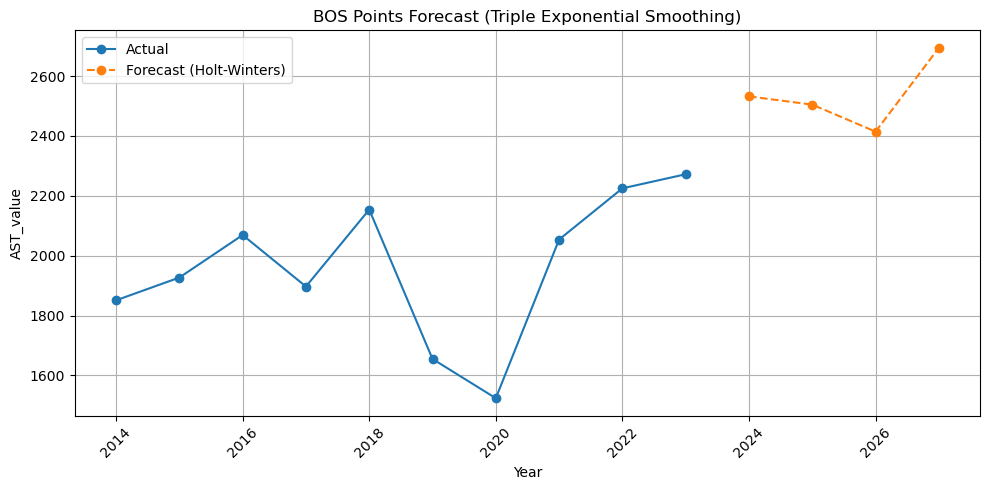

In [46]:
team=input('enter the team name that you want to check for')
att=input('name of the attribute for prediction')
exp_att=season_copy[['year','TEAM',att]]
expd1=exp_att[exp_att['TEAM']==team]
expg1=expd1.groupby('year')[att].sum().reset_index()

model = ExponentialSmoothing(
    expg1[att],
    trend='add',        # Can be 'add' or 'mul' or None
    seasonal='add',     # Try 'add' or 'mul', or None if you don’t expect seasonal patterns
    seasonal_periods=3  # Assuming some short-term cycle; you can adjust or remove
)

fit = model.fit(optimized=True)

# Forecast next 3 years
forecast = fit.forecast(4)

# Show forecast with years
future_years = [2024,2025,2026,2027]
forecast_df = pd.DataFrame({'year': future_years, f'{team}_forecast': forecast})
print(forecast_df)
# Plot
plt.figure(figsize=(10, 5))
plt.plot(expg1['year'], expg1[att], label='Actual', marker='o')
plt.plot(future_years, forecast, label='Forecast (Holt-Winters)', marker='o', linestyle='--')
plt.title(f'{team} Points Forecast (Triple Exponential Smoothing)')
plt.xlabel('Year')
plt.ylabel(f'{att}_value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()